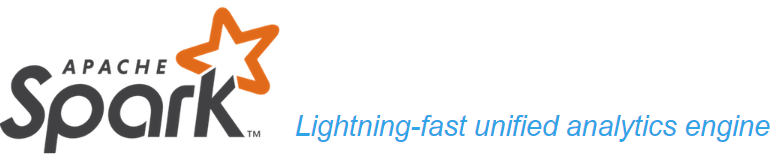

Note: Apache Spark is trade mark of Apache Software Foundation

Entire Spark is devided into two types

1. <a href="http://spark.apache.org/docs/latest/rdd-programming-guide.html" target=_blank>Unstructured API: RDD falls under Unstructured API</a>
2. <a href="http://spark.apache.org/docs/latest/sql-programming-guide.html" target=_blank>Structured API: DataFrame, DataSets and Sql table/view fall under Structured API</a>

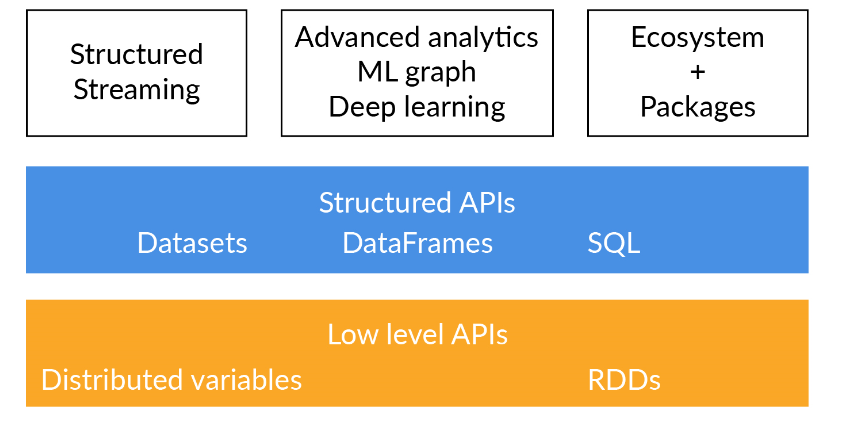


# Unstructured API: Resilient Distributed Datasets (RDDs)
Spark revolves around the concept of a resilient distributed dataset (RDD), which is a fault-tolerant collection of elements that can be operated on in parallel. There are two ways to create RDDs: parallelizing an existing collection in your driver program, or referencing a dataset in an external storage system, such as a shared filesystem, HDFS, HBase, or any data source offering a Hadoop InputFormat.

In [1]:
from pyspark import SparkContext
sc = SparkContext("yarn", "rdd")

In [2]:
sc

<SparkContext master=yarn appName=rdd>

In [3]:
data = [1, 2, 3, 4, 5]
distData = sc.parallelize(data) # rdd can be created by calling parallelize method 
distFile = sc.textFile("/usr/local/spark/data/mllib/sample_lda_data.txt") # rdd can be created by referencing external datasource
distData.collect()
#type(distData)
type(distFile)

pyspark.rdd.RDD

In [4]:
distData.take(5)

[1, 2, 3, 4, 5]

In [5]:
# Starting Point: SparkSession
# The entry point into all functionality in Spark is the SparkSession class.
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("Basic RDD openration") \
    .getOrCreate()

In [6]:
spark

In [7]:
myCollection = "Welcome to PySpark and Machine Learning"\
  .split(" ")
words = spark.sparkContext.parallelize(myCollection, 2)
type(words)

pyspark.rdd.RDD

In [8]:
words.collect()

['Welcome', 'to', 'PySpark', 'and', 'Machine', 'Learning']

In [9]:
words.setName("myWords")
words.name() # myWords

'myWords'

In [10]:
spark.range(10).rdd # rdd can be created by calling rdd method on SparkSession object

MapPartitionsRDD[10] at javaToPython at NativeMethodAccessorImpl.java:0

In [11]:
myrdd =spark.range(10).toDF("id").rdd.map(lambda row: row[0])
# rdd can be created from dataframe by calling rdd method on dataframe
myrdd.collect()


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [12]:
spark.range(10).rdd.toDF() # rdd can be converted into dataframe by calling toDF() method on dataframe

DataFrame[id: bigint]

In [13]:
def startsWithS(individual):
  return individual.startswith("W")

In [14]:
words.filter(lambda word: startsWithS(word)).collect()

['Welcome']

In [15]:
words2 = words.map(lambda word: (word, word[0], word.startswith("P")))

In [16]:
words2.filter(lambda record: record[2]).take(1)

[('PySpark', 'P', True)]

In [17]:
words.flatMap(lambda word: list(word)).take(5)

['W', 'e', 'l', 'c', 'o']

In [18]:
words.sortBy(lambda word: len(word) * -1).take(2)

['Learning', 'Welcome']

In [19]:
fiftyFiftySplit = words.randomSplit([0.5, 0.5])

In [20]:
spark.sparkContext.parallelize(range(1, 21)).reduce(lambda x, y: x + y)

210

In [21]:
def wordLengthReducer(leftWord, rightWord):
  if len(leftWord) > len(rightWord):
    return leftWord
  else:
    return rightWord

In [22]:
words.reduce(wordLengthReducer)

'Learning'

In [23]:
words.getStorageLevel()

StorageLevel(False, False, False, False, 1)

In [24]:
words.mapPartitions(lambda part: [1]).sum()

2

In [25]:
def indexedFunc(partitionIndex, withinPartIterator):
  return ["partition: {} => {}".format(partitionIndex,
    x) for x in withinPartIterator]
words.mapPartitionsWithIndex(indexedFunc).collect()


['partition: 0 => Welcome',
 'partition: 0 => to',
 'partition: 0 => PySpark',
 'partition: 1 => and',
 'partition: 1 => Machine',
 'partition: 1 => Learning']

In [26]:
spark.sparkContext.parallelize(["Hello", "World"], 2).glom().collect()

[['Hello'], ['World']]